In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
from matplotlib import pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import wget
import os
import aiohttp
import asyncio
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
from fpl import FPL
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets
from models import PreviousScoreModel, PlayerAvgScoreModel, LinearModel

In [2]:
fpl = await get_fpl()
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]
teams = get_teams(team_feature_names=opponent_feature_names, visualize=False)
players = await get_players(player_feature_names, visualize=False, num_players=590)
train_loader, test_loader = get_training_datasets(players, teams)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7fad18e9c250>,
 <torch.utils.data.dataloader.DataLoader at 0x7fad18e99e10>)

In [3]:
previous_score_model = PreviousScoreModel(player_feature_names, opponent_feature_names)
player_avg_score_model = PlayerAvgScoreModel(player_feature_names, opponent_feature_names)
player_linear_score_model = LinearModel(player_feature_names, opponent_feature_names)
player_opponent_linear_score_model = LinearModel(player_feature_names, opponent_feature_names, use_opponent_features=True)

player_linear_score_model.fit(train_loader)
player_opponent_linear_score_model.fit(train_loader)
print(previous_score_model.eval(test_loader))
print(player_avg_score_model.eval(test_loader))
print(player_linear_score_model.eval(test_loader))
print(player_opponent_linear_score_model.eval(test_loader))

0.893512302696276
SpearmanrResult(correlation=0.5859071057920465, pvalue=2.7723419835299173e-279)
0.7490610517629673
SpearmanrResult(correlation=0.6041277332918852, pvalue=2.0736225531408324e-301)
0.5650078717988432
SpearmanrResult(correlation=0.6241525063897441, pvalue=0.0)
0.5638436444062317
SpearmanrResult(correlation=0.6123860684046951, pvalue=6.4291872922e-312)


torch.Size([3035, 5, 4])


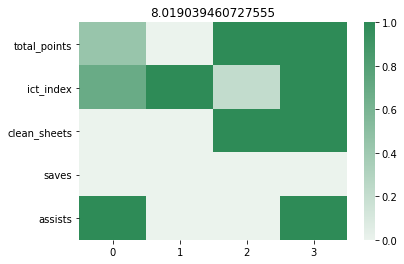

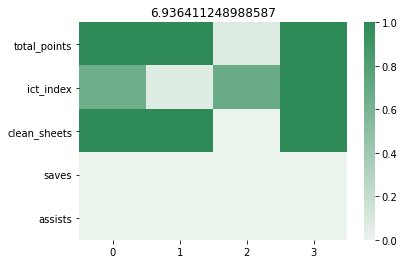

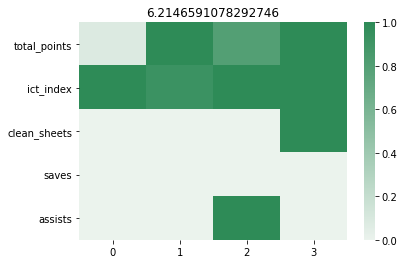

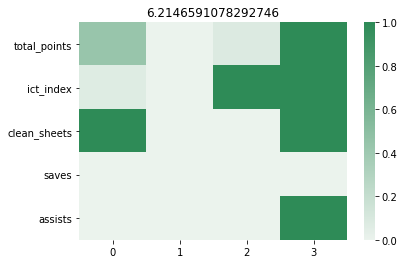

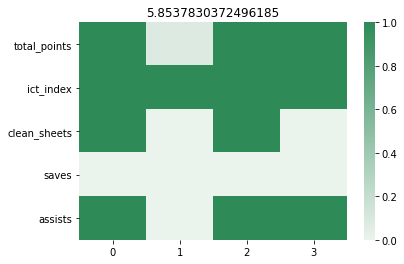

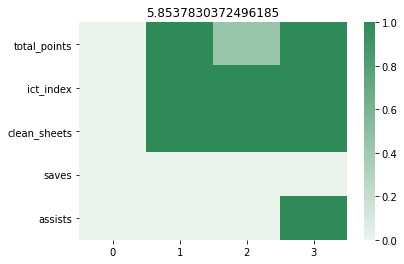

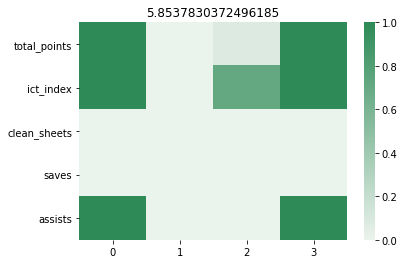

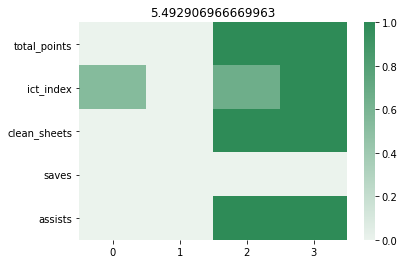

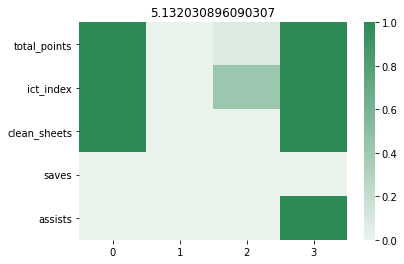

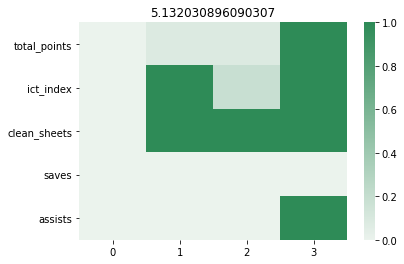

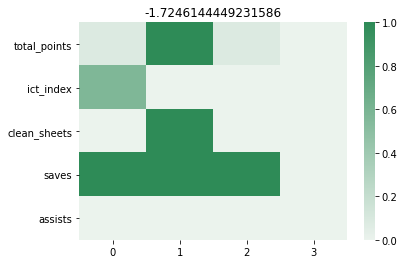

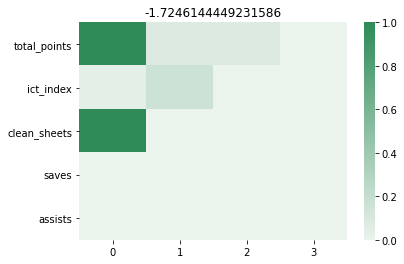

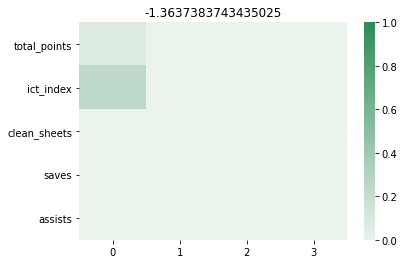

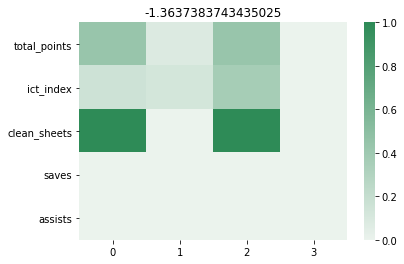

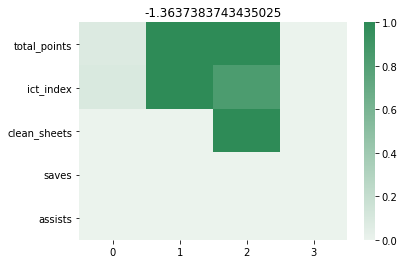

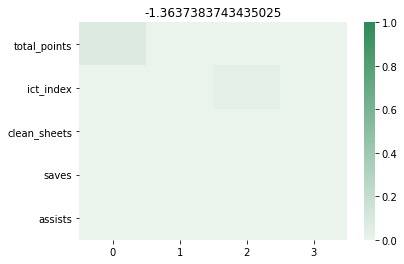

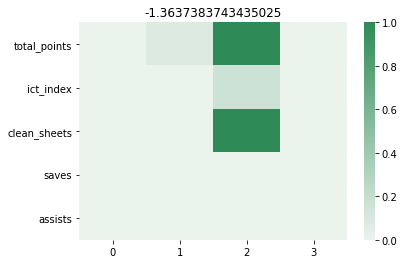

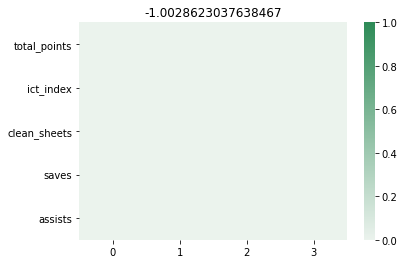

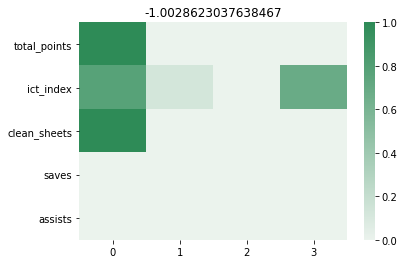

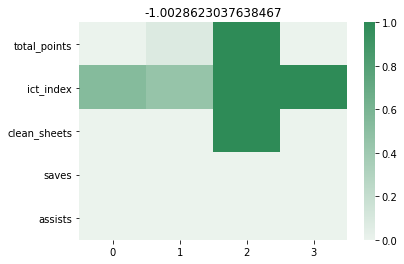

In [4]:
previous_score_model.visualize_predictions(test_loader)

torch.Size([3035, 5, 4])


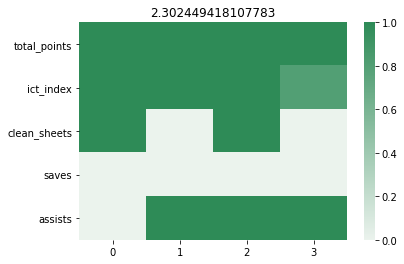

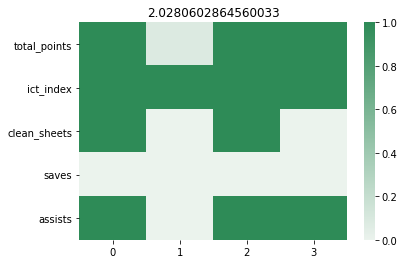

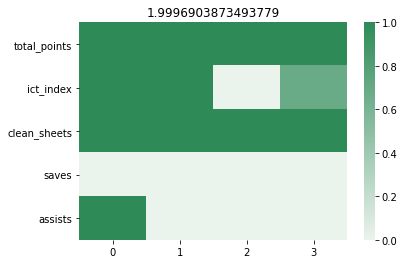

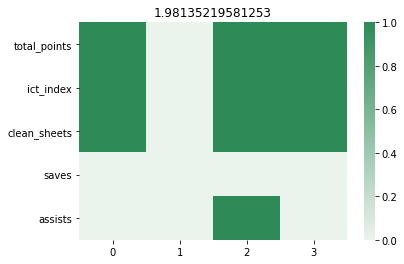

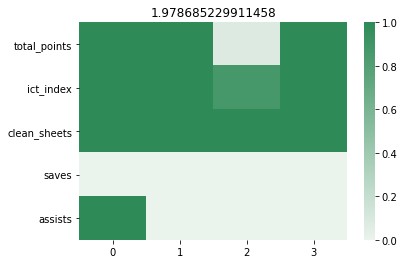

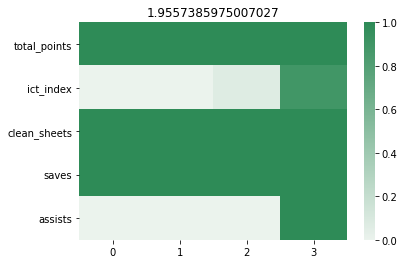

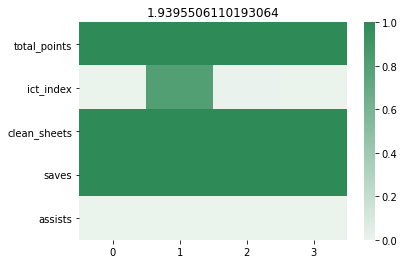

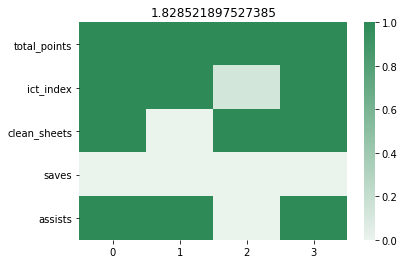

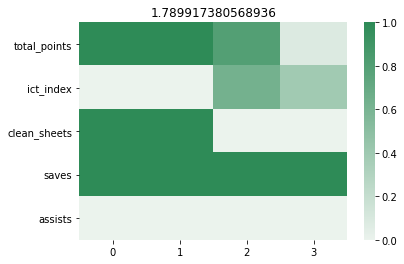

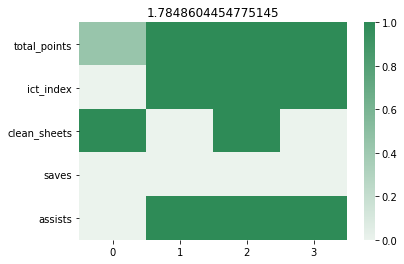

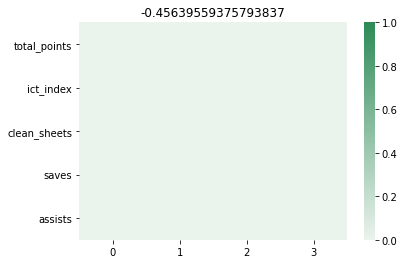

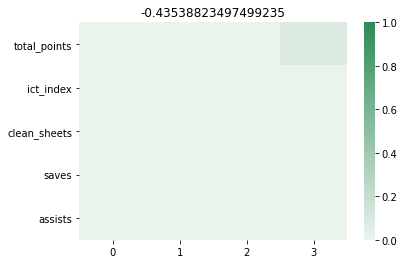

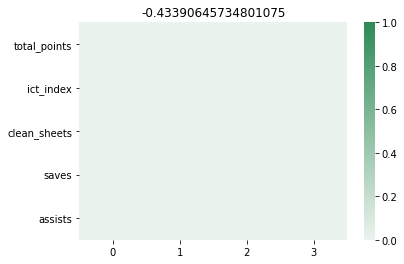

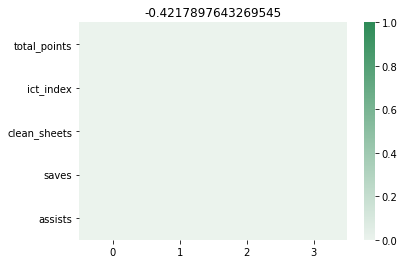

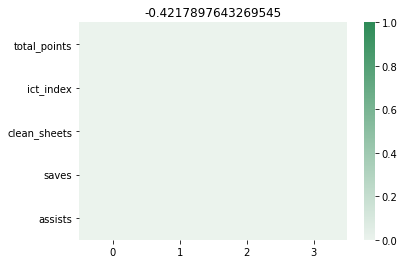

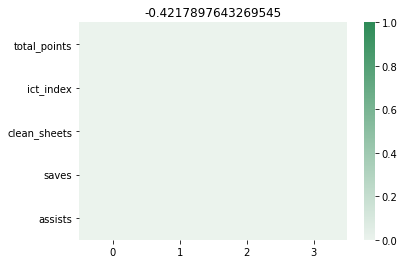

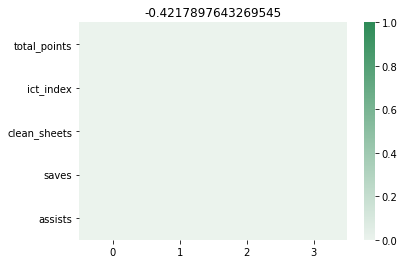

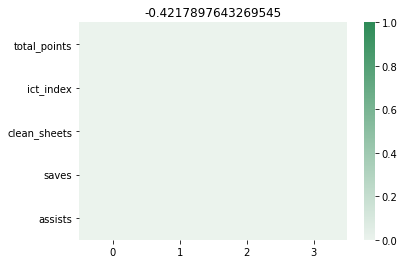

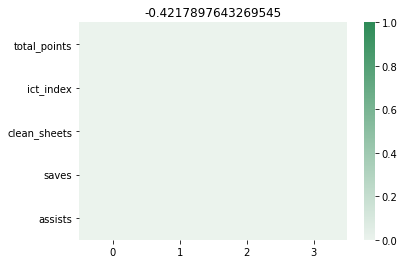

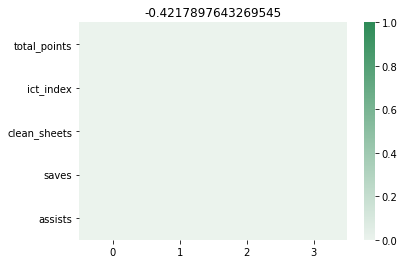

In [5]:
player_avg_score_model.visualize_predictions(test_loader)

torch.Size([3035, 5, 4])


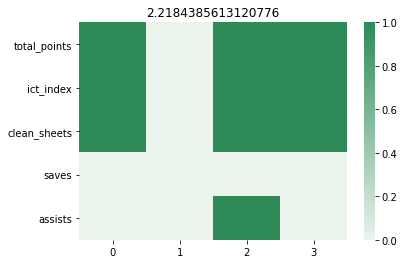

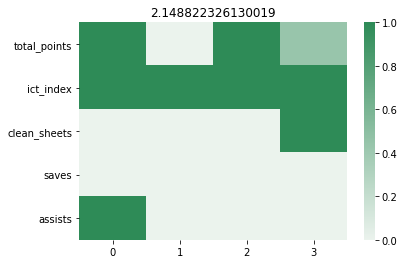

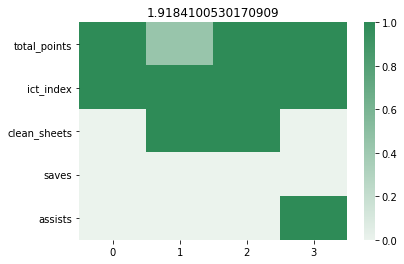

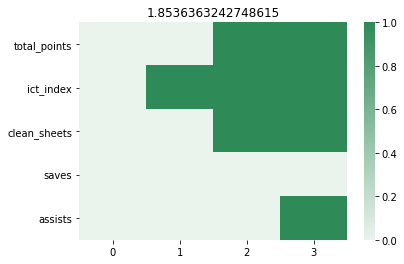

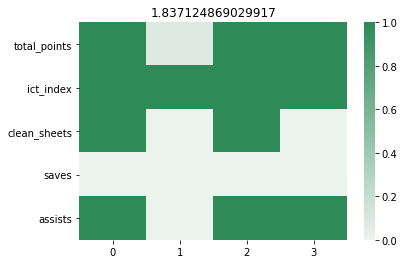

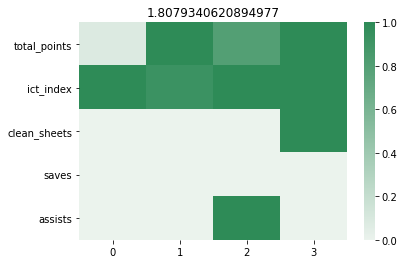

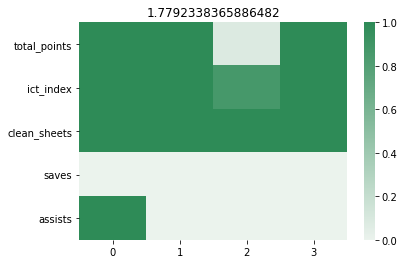

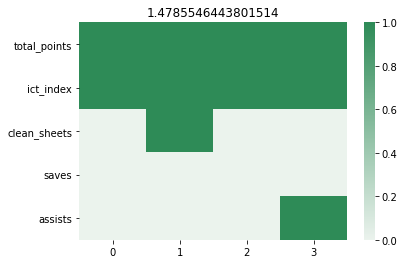

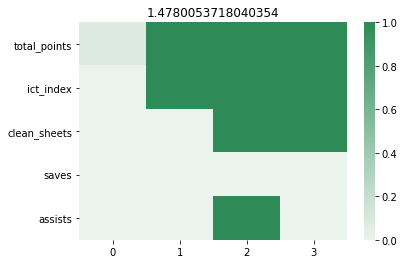

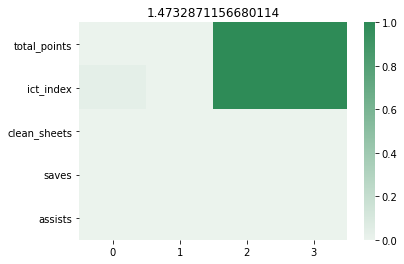

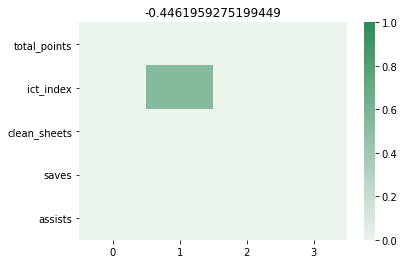

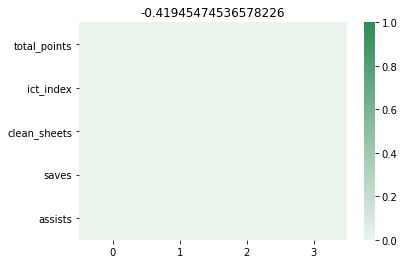

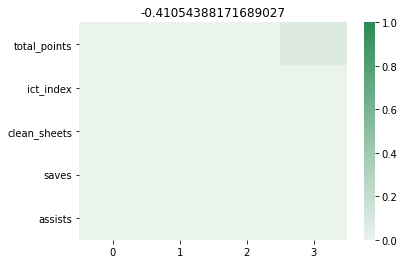

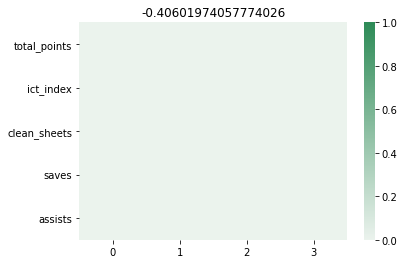

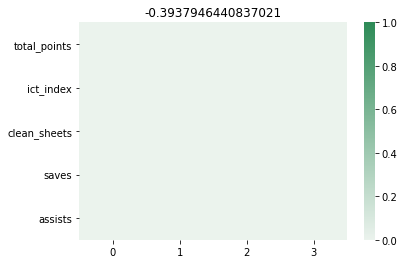

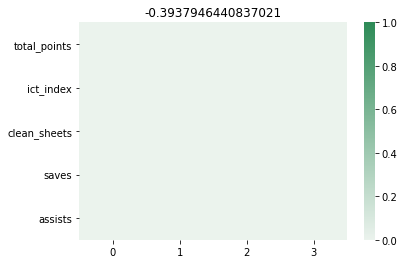

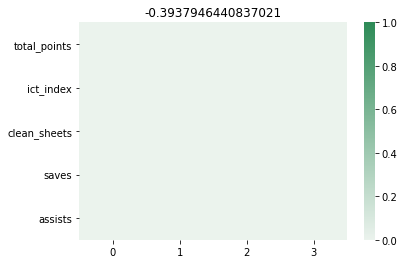

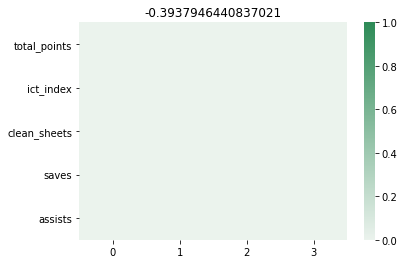

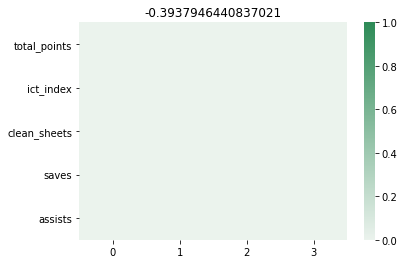

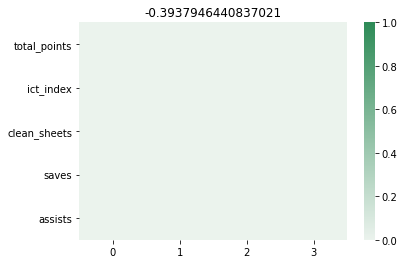

In [6]:
player_linear_score_model.visualize_predictions(test_loader)

torch.Size([3035, 20])


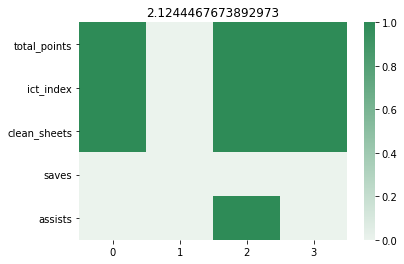

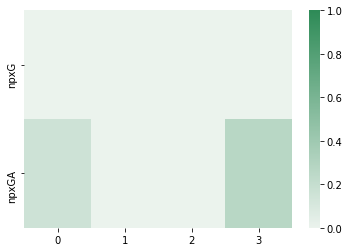

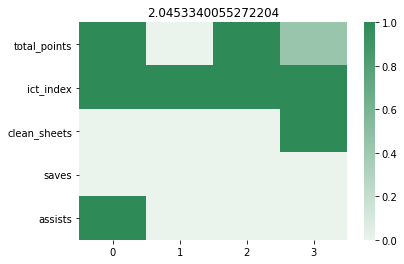

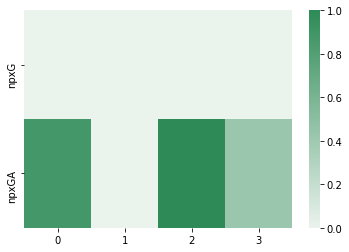

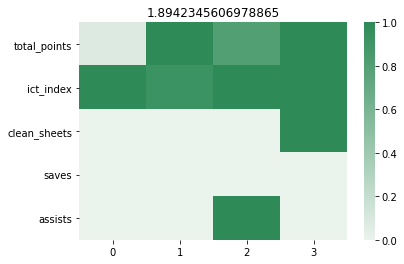

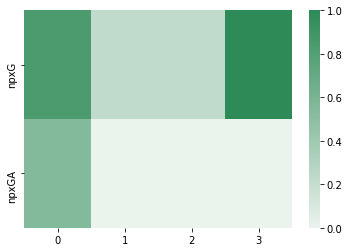

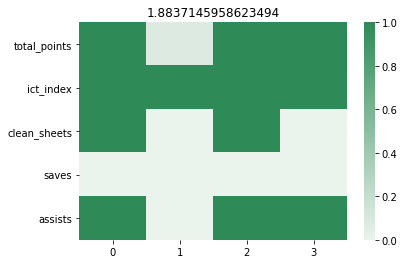

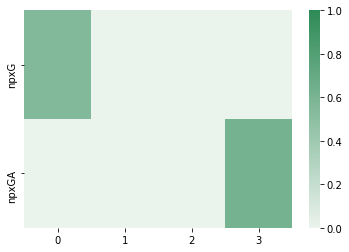

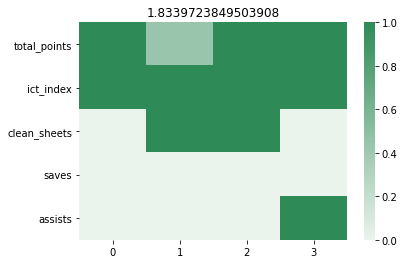

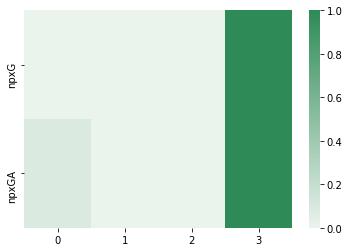

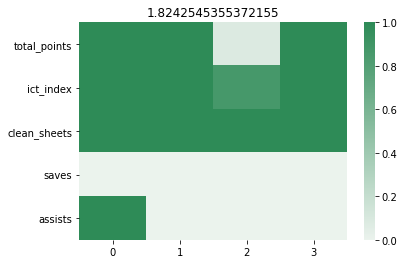

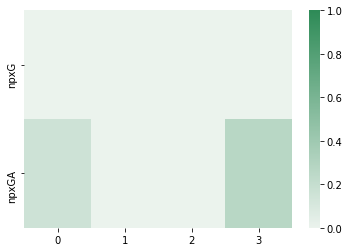

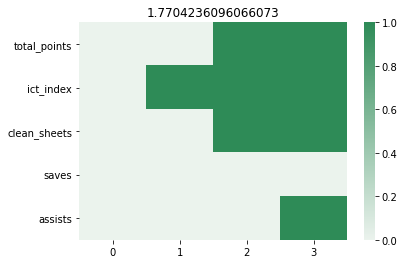

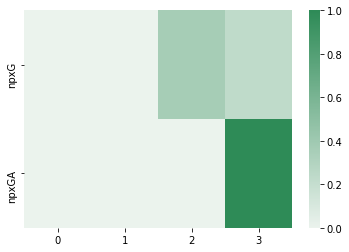

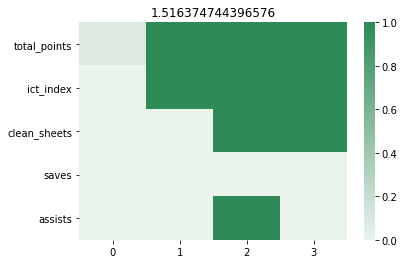

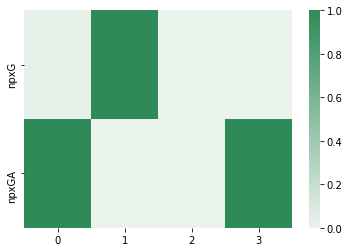

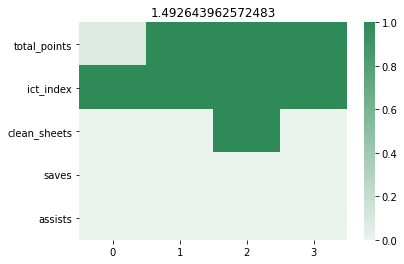

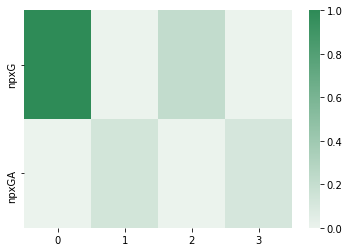

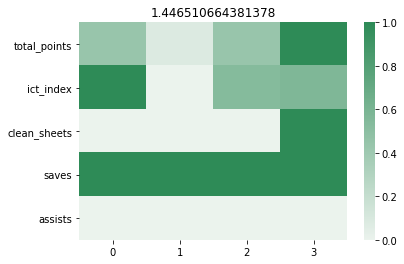

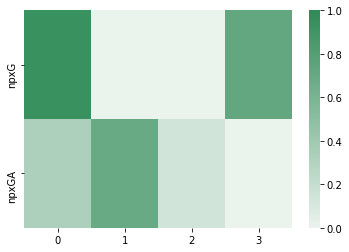

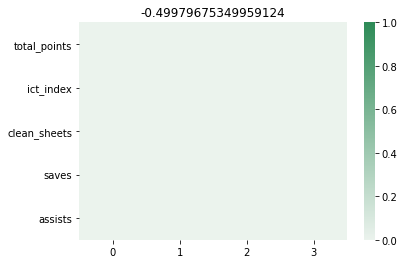

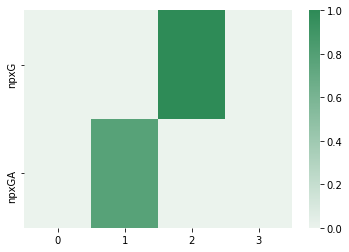

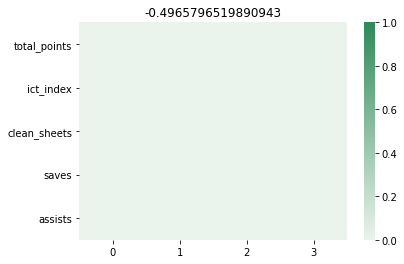

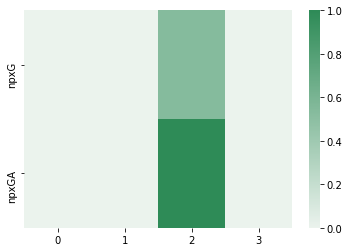

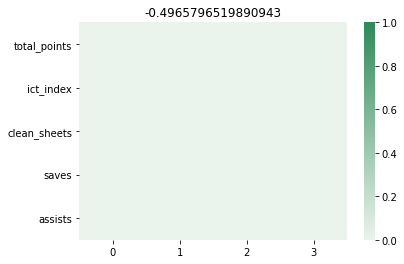

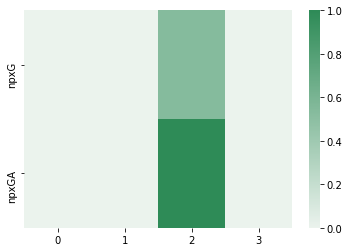

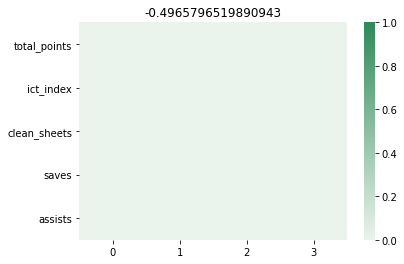

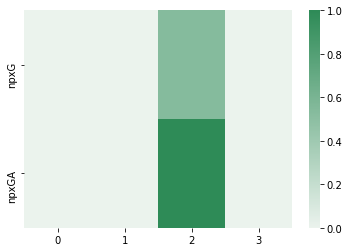

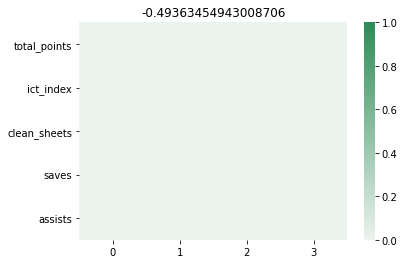

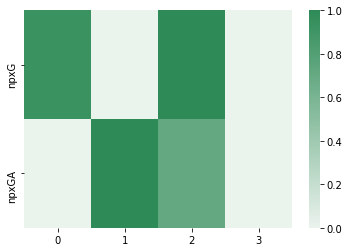

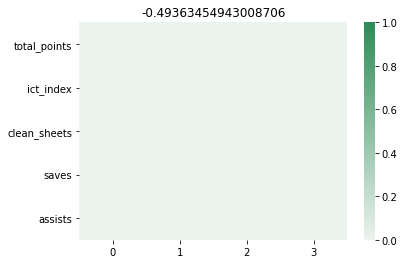

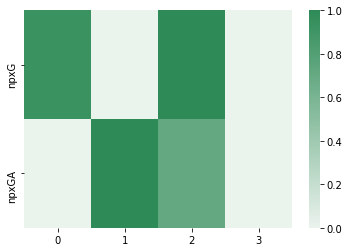

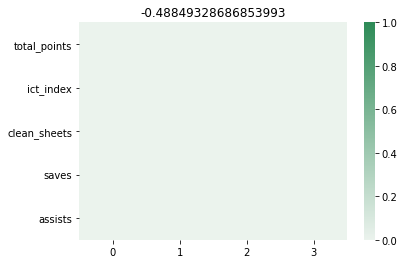

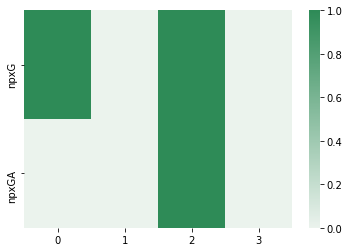

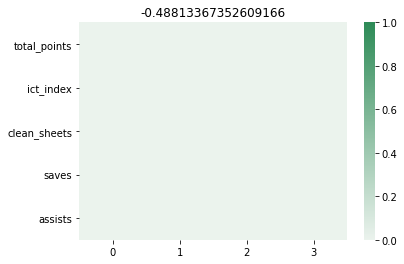

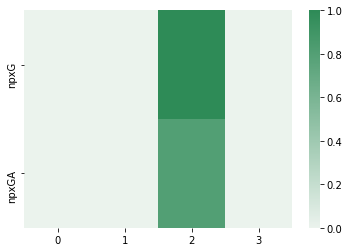

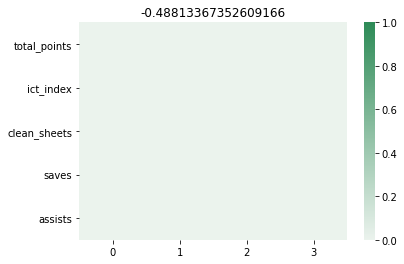

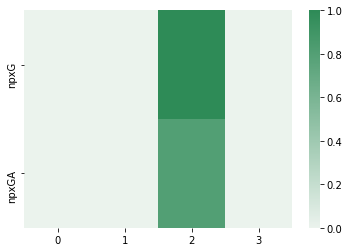

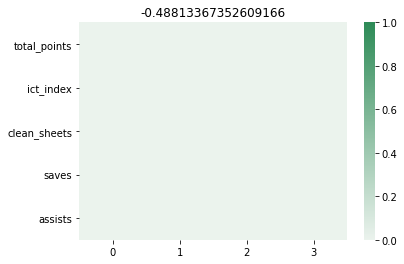

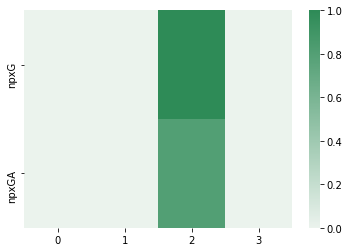

In [7]:
player_opponent_linear_score_model.visualize_predictions(test_loader)

In [8]:
list(player_linear_score_model.model.parameters())

[Parameter containing:
 tensor([[ 0.0494,  0.0374,  0.0695,  0.0295,  0.0472,  0.0442,  0.0975,  0.1730,
          -0.0140,  0.0375,  0.0116,  0.0462,  0.0540, -0.0030,  0.0105,  0.0332,
          -0.0103,  0.0040, -0.0267, -0.0162]], dtype=torch.float64,
        requires_grad=True),
 Parameter containing:
 tensor([0.0075], dtype=torch.float64, requires_grad=True)]